# Imports

In [1]:
# magic for modules reloading 
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from models import KMeans, KNNClassifier, KNNRegressor

from sklearn.cluster import KMeans as SKmeans
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.utils.estimator_checks import check_estimator

# Useful functions

In [3]:
def accuracy(y_true, preds):
    return ( (y_true == preds).sum() ) / len(preds)

In [4]:
def norm2x2(mu, s2, size):
    x1 = np.asarray([
        np.random.normal(mu, s2, size),
        np.random.normal(mu, s2, size),
    ]).T

    x2 = np.asarray([
        np.random.normal(1 - mu, s2, size),
        np.random.normal(1 - mu, s2, size),
    ]).T

    y1 = np.zeros((size,))
    y2 = np.ones((size,))
    
    return x1, x2, y1, y2

In [5]:
def check_estimator_independently(checks):
    bad_checks = []
    good_checks = []
    row = 0
    for estimator, check in checks:
        try:
            check(estimator)
            good_checks.append(check)
    #         print(check, 'passed!')
        except Exception as e:
            bad_checks.append(check)
            print(f'{row}:', e)
            row += 1
    return bad_checks, good_checks

In [21]:
def compare_models(model1, model2, X_train, y_train):
    _ = model1.fit(X_train)
    _ = model2.fit(X_train)
    preds1 = model1.predict(X_train)
    preds2 = model2.predict(X_train)
    print('model1 score on train: ', model1.score(X_train, y_train))
    return preds1, preds2

# Check sklearn API compatibility 

## KMeans

In [6]:
checks = check_estimator(KMeans(), generate_only=True)

In [7]:
bad_checks, good_checks = check_estimator_independently(checks)

0: Did not raise: [<class 'ValueError'>]
1: loop of ufunc does not support argument 0 of type float which has no callable sqrt method
2: Did not raise: [<class 'ValueError'>]


/Users/ml003/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ml003/Documents/some_scripts/my_projects/mts_teta/ml/custom-k/models/k_means/KMeans.py:65: RuntimeWarning: invalid value encountered in double_scalars
  return norm(self.means_ - self._prev_means) / norm(self._prev_means) < self.epsilon
/Users/ml003/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ml003/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


3: Estimator KMeans doesn't check for NaN and inf in fit.
4: Estimator KMeans doesn't seem to fail gracefully on sparse data: error message should state explicitly that sparse input is not supported if this is not the case.
5: 
Not equal to tolerance rtol=1e-07, atol=1e-09
Idempotency check failed for method predict
Mismatched elements: 1 / 20 (5%)
Max absolute difference: 1
Max relative difference: 1.
 x: array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1])
 y: array([1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1])
6: 


In [8]:
bad_checks[6](KMeans())

AssertionError: 

Здесь мне неясно, что произошло в 5 пункте. В дальнейших тестах я не нашёл проблем  
В остальном проблемы кажутся не столь важными, в API указана необходимость некоторых методов, но не проверок

## KNNClassifier

In [12]:
checks = check_estimator(KNNClassifier(), generate_only=True)

In [13]:
bad_checks, good_checks = check_estimator_independently(checks)

0: Did not raise: [<class 'ValueError'>]
1: loop of ufunc does not support argument 0 of type float which has no callable sqrt method
2: The estimator KNNClassifier does not raise a ValueError when an empty data is used to train. Perhaps use check_array in train.
3: Estimator KNNClassifier doesn't check for NaN and inf in fit.
4: Estimator KNNClassifier doesn't seem to fail gracefully on sparse data: error message should state explicitly that sparse input is not supported if this is not the case.


## KNNRegressor

In [14]:
checks = check_estimator(KNNRegressor(), generate_only=True)

In [15]:
bad_checks, good_checks = check_estimator_independently(checks)

0: Did not raise: [<class 'ValueError'>]
1: loop of ufunc does not support argument 0 of type float which has no callable sqrt method
2: The estimator KNNRegressor does not raise a ValueError when an empty data is used to train. Perhaps use check_array in train.
3: Estimator KNNRegressor doesn't check for NaN and inf in fit.
4: Estimator KNNRegressor doesn't seem to fail gracefully on sparse data: error message should state explicitly that sparse input is not supported if this is not the case.


# Make data KMeans

In [17]:
mu = 0.25
s2 = 0.3
n = 300

In [18]:
x1, x2, y1, y2 = norm2x2(mu, s2, n)

In [19]:
X = np.vstack((x1, x2))
y = np.concatenate((y1, y2))

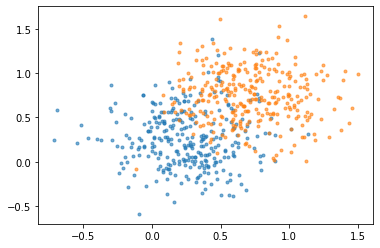

In [20]:
plt.plot(*x1.T, '.', alpha=0.6);
plt.plot(*x2.T, '.', alpha=0.6);

# KMeans

Метрика алгоритма, которая минимизируется - сумма квадратов расстояний от центра кластера до его центроиды:

$$ L = \sum_{j=1}^k \sum_{i=1}^n \lVert x_i - \mu_j \rVert}$$

## Custom

In [46]:
model = KMeans(k_clusters=2, init_means=[[0, 1], [1, 0]])

In [47]:
_ = model.fit(X)

In [48]:
preds = model.predict(X)

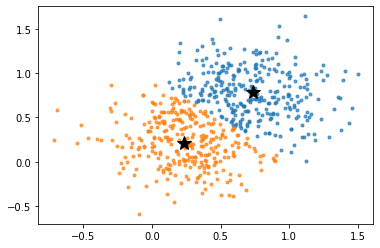

In [49]:
plt.plot(*X[preds==0].T, '.', alpha=0.7)
plt.plot(*X[preds==1].T, '.', alpha=0.7)
plt.plot(*model.means_.T, '*', color='black', markersize=15)

## sklearn

In [53]:
model_skl = SKmeans(2, init = [[0, 1], [1, 0]])

In [54]:
_ = model_skl.fit(X)

/Users/ml003/miniconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1305: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params(X)


In [55]:
preds_skl = model_skl.predict(X)

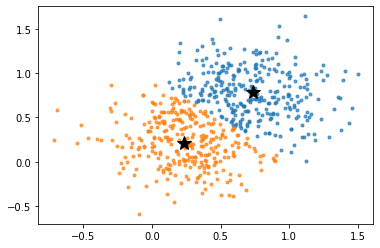

In [56]:
plt.plot(*X[preds_skl==0].T, '.', alpha=0.7)
plt.plot(*X[preds_skl==1].T, '.', alpha=0.7)
plt.plot(*model_skl.cluster_centers_.T, '*', color='black', markersize=15)

## Сравним на трейне

In [42]:
accuracy(y, preds), accuracy(y, preds_skl)

(0.135, 0.135)

In [43]:
model.score(X), model_skl.score(X)

(-91.77379337023825, -91.77379337023825)

метрика отрицательна, так как в sklearn все принято максимизировать метрики при оптимизации

In [57]:
model.means_

array([[0.73258716, 0.78778042],
       [0.23137138, 0.21730623]])

In [58]:
model_skl.cluster_centers_

array([[0.73258716, 0.78778042],
       [0.23137138, 0.21730623]])

  
___
**Вывод**: Результаты для кастомной модели и реализованной в sklearn сошлись

# KNN

## classifier

### Custom

In [87]:
knnc = KNNClassifier(k_neighbors=5)

In [88]:
_ = knnc.fit(X, y)

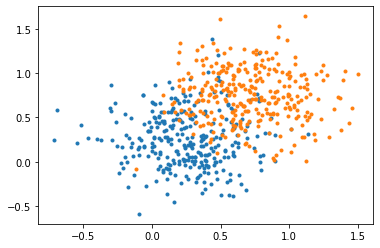

In [89]:
plt.plot(*X[y==0].T, '.')
plt.plot(*X[y==1].T, '.')

In [90]:
preds = knnc.predict(X)

### Тестовые данные


Интересно посмотреть, как классифицирует новые данные:

In [81]:
x1_test, x2_test, y1_test, y2_test = norm2x2(0.25, 0.3, 100)

In [82]:
X_test = np.vstack((x1_test, x2_test))
y_test = np.concatenate((y1_test, y2_test))

In [83]:
preds_test = knnc.predict(X_test)

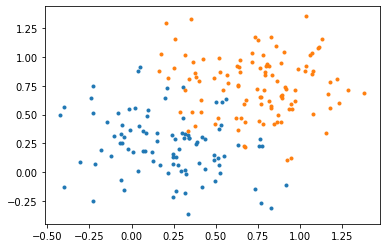

In [84]:
plt.plot(*X_test[preds_test==0].T, '.')
plt.plot(*X_test[preds_test==1].T, '.')

### sklearn

In [91]:
knnc_skl = KNeighborsClassifier(n_neighbors=5)

In [92]:
_ = knnc_skl.fit(X, y)

### Compare

У KNN нет целевой метрики, так как он просто запоминает трейн и при предикте вычисляет ближайших соседей и их лейблы. Но sklearn возвращает accuracy, так что я тоже её реализовал

In [97]:
knnc.score(X, y), knnc_skl.score(X, y)

(0.8933333333333333, 0.8933333333333333)

accuracy на трейне не равно 1, так как принимаем решение по 5 соседям. Чтобы была 1, нужно брать только 1 соседа

In [99]:
knnc.score(X_test, y_test), knnc_skl.score(X_test, y_test)

(0.87, 0.87)

**Вывод**: метрики сходятся и на трейне и на тесте

## Regressor

### Make data for regression

In [100]:
x = np.linspace(0, 2 * np.pi, 500).reshape(-1, 1)
y = np.sin(x)
x_test = x + np.pi
y_test = np.sin(x_test)

### Custom

In [137]:
knnr = KNNRegressor(2)
_ = knnr.fit(x, y)

In [138]:
preds = knnr.predict(x_test)

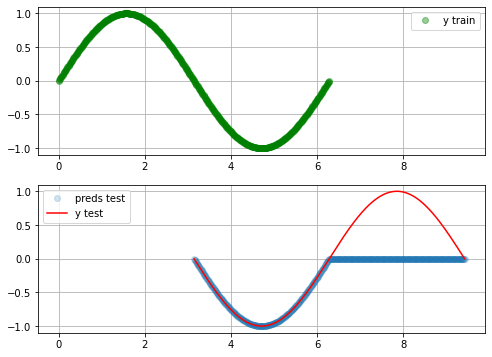

In [139]:
plt.figure(figsize=(8, 6))

ax1 = plt.subplot(211)
ax1.plot(x, y, 'o', color='green', alpha=0.4, label='y train')
ax1.legend()
ax1.grid()

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(x_test, preds, 'o', label='preds test', alpha=0.2)
ax2.plot(x_test, y_test, color='red', label='y test')
ax2.legend()
ax2.grid()

### sklearn

In [133]:
knnr_skl = KNeighborsRegressor()

In [134]:
knnr_skl = KNNRegressor(2)
_ = knnr_skl.fit(x, y)

In [135]:
preds_skl = knnr_skl.predict(x_test)

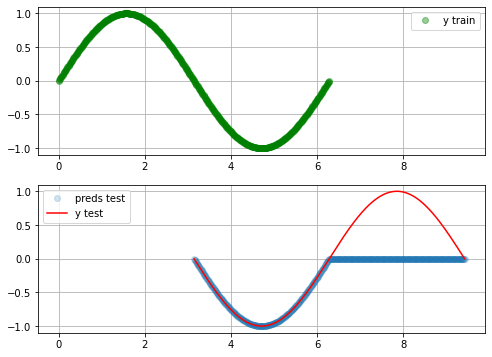

In [136]:
plt.figure(figsize=(8, 6))

ax1 = plt.subplot(211)
ax1.plot(x, y, 'o', color='green', alpha=0.4, label='y train')
ax1.legend()
ax1.grid()

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(x_test, preds_skl, 'o', label='preds test', alpha=0.2)
ax2.plot(x_test, y_test, color='red', label='y test')
ax2.legend()
ax2.grid()

### Compare

Аналогично вместо целевой метрики, которой нет, sklearn у регрессора возвращает $R^2$ (без поправки)

In [140]:
knnr.score(x, y), knnr_skl.score(x, y)

(-998.8051466222348, -998.8051466222348)

In [114]:
knnr.score(x_test, y_test), knnr_skl.score(x_test, y_test)

(-749.0099479992706, -749.0099479992706)

Выглядит странно, но хотя бы совпадает между реализациями. Попробую посчитать $R^2$ иначе

In [119]:
from sklearn.metrics import r2_score

In [125]:
r2_score(y_test, preds_skl)

0.49194449189472167

Пока что мне непонятно, в чём проблема, постараюсь осознать это позже